In [0]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tensorflow.__version__)

1.15.2


In [0]:
!mkdir /root/.kaggle
!echo '{"username":"vignesh77","key":"your key"}' > /root/.kaggle/kaggle.json

!kaggle datasets download -d ahmetfurkandemr/mask-datasets-v1

100% 754M/754M [00:07<00:00, 126MB/s]



In [0]:

import os
import zipfile

local_zip = '/content/mask-datasets-v1.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content')
zip_ref.close()

In [0]:
import os
# Define our example directories and files
base_dir = '/content/Mask_Datasets'

train_dir = os.path.join( base_dir, 'Train')
validation_dir = os.path.join( base_dir, 'Validation')



train_3_dir = os.path.join(train_dir, 'Mask') 

train_4_dir = os.path.join(train_dir, 'No_mask') 



validation_3_dir = os.path.join(validation_dir, 'Mask')

validation_4_dir = os.path.join(validation_dir, 'No_mask') 


train_3_fnames = os.listdir(train_3_dir)
train_4_fnames = os.listdir(train_4_dir)


# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,rotation_range=15,
                                    width_shift_range=0.15,
                                    height_shift_range=0.15,
                                    shear_range=0.15,
                                    zoom_range=0.15,
                                    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 32,
                                                    class_mode = 'binary', 
                                                    target_size = (150,150))     

validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 32,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))


Found 750 images belonging to 2 classes.
Found 350 images belonging to 2 classes.


In [0]:


model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    
      
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    
      
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(246, (3,3), activation='relu'),

      
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),


    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 246)       283638    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 246)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 17, 17, 246)      

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])


In [0]:
history = model.fit(train_generator, epochs=100, steps_per_epoch=23, validation_data = validation_generator, verbose = 1, validation_steps=10)


Epoch 1/100
23/23 [==============================] - 112s 5s/step - loss: 2.2603 - acc: 0.5487 - val_loss: 0.6413 - val_acc: 0.5781
Epoch 2/100
23/23 [==============================] - 112s 5s/step - loss: 0.6856 - acc: 0.6017 - val_loss: 0.6487 - val_acc: 0.6969
Epoch 3/100
23/23 [==============================] - 112s 5s/step - loss: 0.5701 - acc: 0.7479 - val_loss: 0.3975 - val_acc: 0.8500
Epoch 4/100
23/23 [==============================] - 115s 5s/step - loss: 0.4296 - acc: 0.8287 - val_loss: 0.2972 - val_acc: 0.9000
Epoch 5/100
23/23 [==============================] - 113s 5s/step - loss: 0.4242 - acc: 0.8273 - val_loss: 0.3717 - val_acc: 0.8844
Epoch 6/100
23/23 [==============================] - 112s 5s/step - loss: 0.3807 - acc: 0.8412 - val_loss: 0.8350 - val_acc: 0.6281
Epoch 7/100
23/23 [==============================] - 115s 5s/step - loss: 0.3306 - acc: 0.8573 - val_loss: 0.2627 - val_acc: 0.8844
Epoch 8/100
23/23 [==============================] - 110s 5s/step - loss: 0.

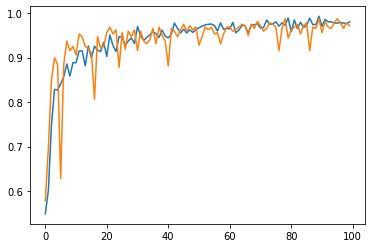

In [0]:
import matplotlib.pyplot as plt
#print(history)
t_a=history.history['acc']
v_a=history.history['val_acc']
plt.plot([i for i in range(0,len(t_a))],t_a)
plt.plot([i for i in range(0,len(v_a))],v_a)


In [0]:


import numpy as np
import tensorflow as tf

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()
#model=tf.keras.models.load_model('/content/model1.h5')

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " no mask")
    
  else:
    print(fn + " is a mask")
 

Saving Adam_Rich_0001.jpg to Adam_Rich_0001.jpg
Saving Adam_Sandler_0001.jpg to Adam_Sandler_0001.jpg
Saving Adam_Sandler_0004.jpg to Adam_Sandler_0004.jpg
Saving Adam_Scott_0002.jpg to Adam_Scott_0002.jpg
[0.]
Adam_Rich_0001.jpg is a mask
[1.]
Adam_Sandler_0001.jpg no mask
[1.]
Adam_Sandler_0004.jpg no mask
[1.]
Adam_Scott_0002.jpg no mask


In [0]:
model.save("model2.h5")